# Tree-Based Methods

-------------------

## Exercise - Test error from Random Forests.

In the lab, we applied random forests to the `Boston` data using `max_features = 6` and using `n_estimators = 25` and `n_estimators = 500`. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for `max_features` and `n_estimators`. Describe the results obtained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline

In [138]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error

In [5]:
boston = pd.read_csv('Boston.csv').drop('Unnamed: 0', axis=1)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
x = boston.drop('medv', axis=1)
y = boston.medv

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=1)

In [23]:
regr1 = RandomForestRegressor(n_estimators=25, max_features=6, random_state=1)
regr1.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [24]:
pred = regr1.predict(x_test)

In [25]:
mean_squared_error(y_test, pred)

11.660260616600791

In [26]:
regr2 = RandomForestRegressor(n_estimators=500, max_features=6, random_state=1)
regr2.fit(x_train, y_train)
pred = regr2.predict(x_test)
mean_squared_error(y_test, pred)

11.558461149090949

In [27]:
n_trees = 500
rf1 = RandomForestRegressor(warm_start=True)
boston1_mse = []
for i in range(1, n_trees+1):
    rf1.set_params(n_estimators=i, max_features='auto', random_state=1)
    rf1.fit(x_train, y_train)
    boston1_mse.append(mean_squared_error(y_test, rf1.predict(x_test)))
    
rf2 = RandomForestRegressor(warm_start=True)
boston2_mse = []
for i in range(1, n_trees+1):
    rf2.set_params(n_estimators=i, max_features=0.5, random_state=1)
    rf2.fit(x_train, y_train)
    boston2_mse.append(mean_squared_error(y_test, rf2.predict(x_test)))
    
rf3 = RandomForestRegressor(warm_start=True)
boston3_mse = []
for i in range(1, n_trees+1):
    rf3.set_params(n_estimators=i, max_features='sqrt', random_state=1)
    rf3.fit(x_train, y_train)
    boston3_mse.append(mean_squared_error(y_test, rf3.predict(x_test)))

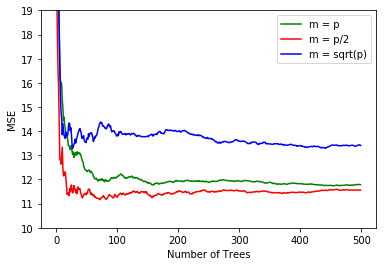

In [28]:
plt.plot(boston1_mse, 'g', label='m = p')
plt.plot(boston2_mse, 'r', label='m = p/2')
plt.plot(boston3_mse, 'b', label='m = sqrt(p)')
plt.ylim(10, 19)
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Exercise - Trees for Regression.

In the lab, a classification tree was applied to the `Carseats` data set after converting `Sales` into a qualitative response variable. Now we will seek to predict `Sales` using regression trees and related approaches, treating the response as a quantitative variable.

a) Split the data set into a training set and a test set.

In [32]:
carseats = pd.read_csv('Carseats.csv').drop('Unnamed: 0', axis=1)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [33]:
# Change object to integers
carseats.ShelveLoc = pd.factorize(carseats.ShelveLoc)[0]
carseats.Urban = carseats.Urban.map({'No':0, 'Yes':1})
carseats.US = carseats.US.map({'No':1, 'Yes':1})
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,1


In [35]:
x = carseats.drop('Sales', axis=1)
y = carseats.Sales

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test error rate do you obtain ?

In [42]:
regr = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5)
regr.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

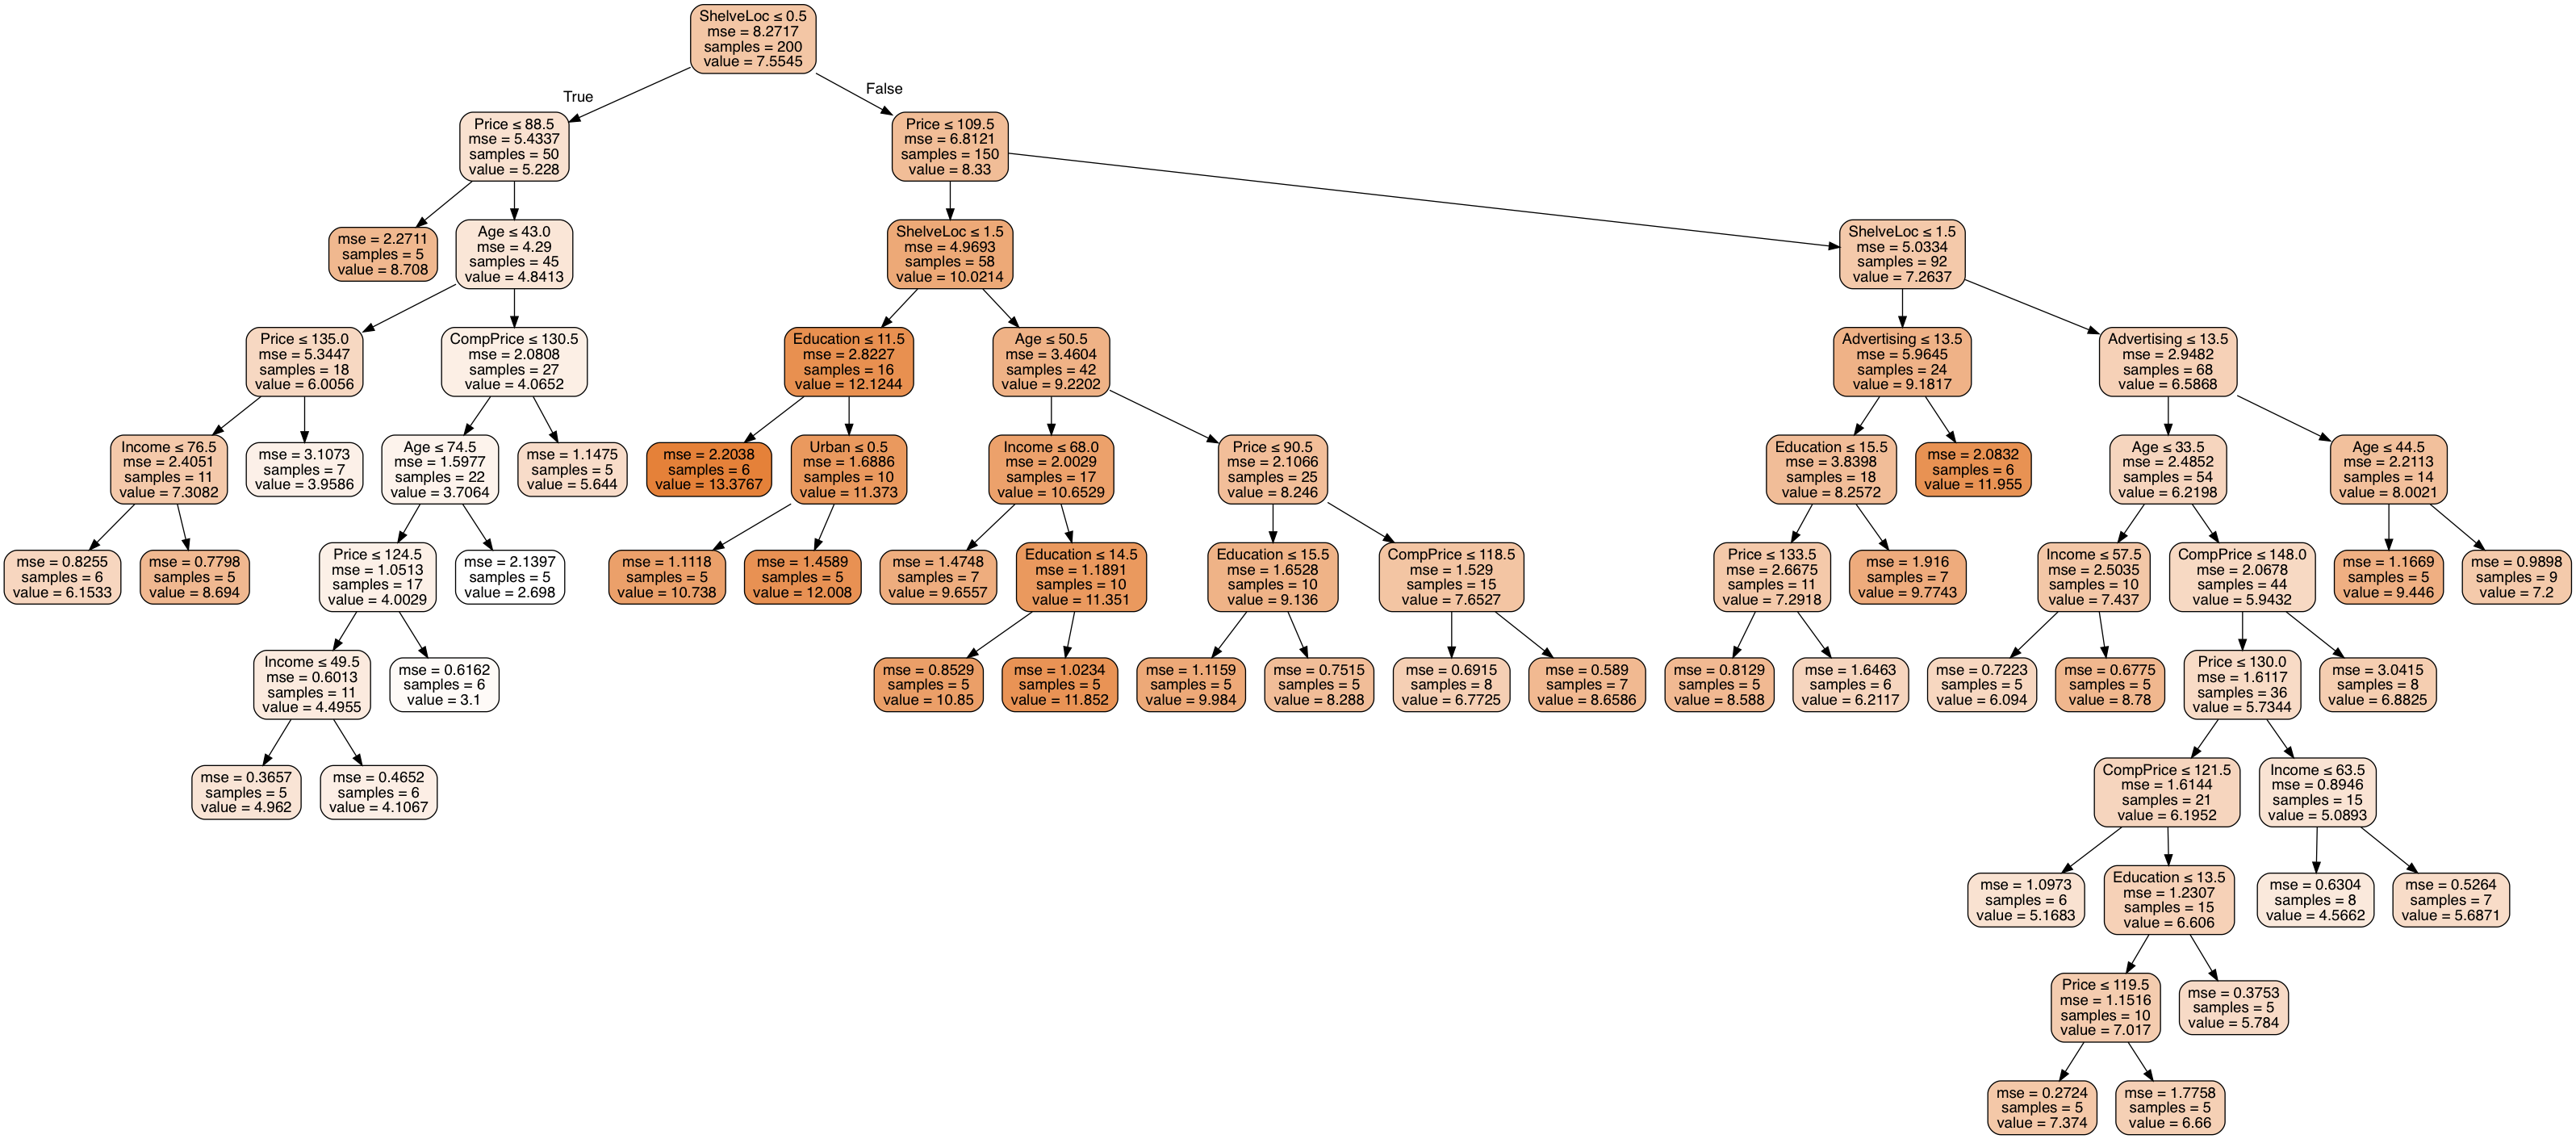

In [43]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(regr, out_file=None,
                                feature_names=x_train.columns,
                                class_names=y_train,
                                filled=True,rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [44]:
mean_squared_error(y_test, regr.predict(x_test))

3.9242846104365072

c) Use the bagging approach in order to analyze this data. What test error rate do you obtain ?

In [45]:
from sklearn.ensemble import BaggingRegressor

bag_car = BaggingRegressor(n_estimators=500, max_features=10, random_state=1)
bag_car.fit(x_train, y_train)
mean_squared_error(y_test, bag_car.predict(x_test))

2.799797870711997

d) Use random forests to analyze this data. What test error rate do you obtain ? Examine the `feature_importances_` attribute to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [47]:
rf_car = RandomForestRegressor(n_estimators=500, max_features='sqrt', random_state=1)
rf_car.fit(x_train, y_train)
mean_squared_error(y_test, rf_car.predict(x_test))

3.1443431934720021

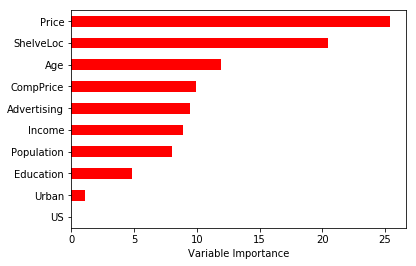

In [48]:
Importance = pd.DataFrame({'Importance': rf_car.feature_importances_*100}, index=x.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## Exercise - Trees and Orange Juice.

This problem involves the “OJ” data set.

a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [66]:
oj = pd.read_csv('OJ.csv').drop('Unnamed: 0', axis=1)
oj.dtypes

Purchase           object
WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7             object
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
dtype: object

In [67]:
oj.Store7.unique()

array(['No', 'Yes'], dtype=object)

In [68]:
oj.Purchase.unique()

array(['CH', 'MM'], dtype=object)

In [69]:
oj.Store7 = oj.Store7.map({'No': 0, 'Yes': 1})
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [70]:
train, test = train_test_split(oj, test_size=1070-800, random_state=1) 

b) Fit a tree to the training data, with `Purchase` as the response and the other variables except for `Buy` as predictors.  What is the training error rate?

In [73]:
x_train = train.drop('Purchase', axis=1)
x_test = test.drop('Purchase', axis=1)
y_train = train['Purchase']
y_test = test['Purchase']

In [74]:
clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [77]:
error = 1 - clf.score(x_train, y_train)
error

0.10499999999999998

c) Create a plot of the tree, and interpret the results.

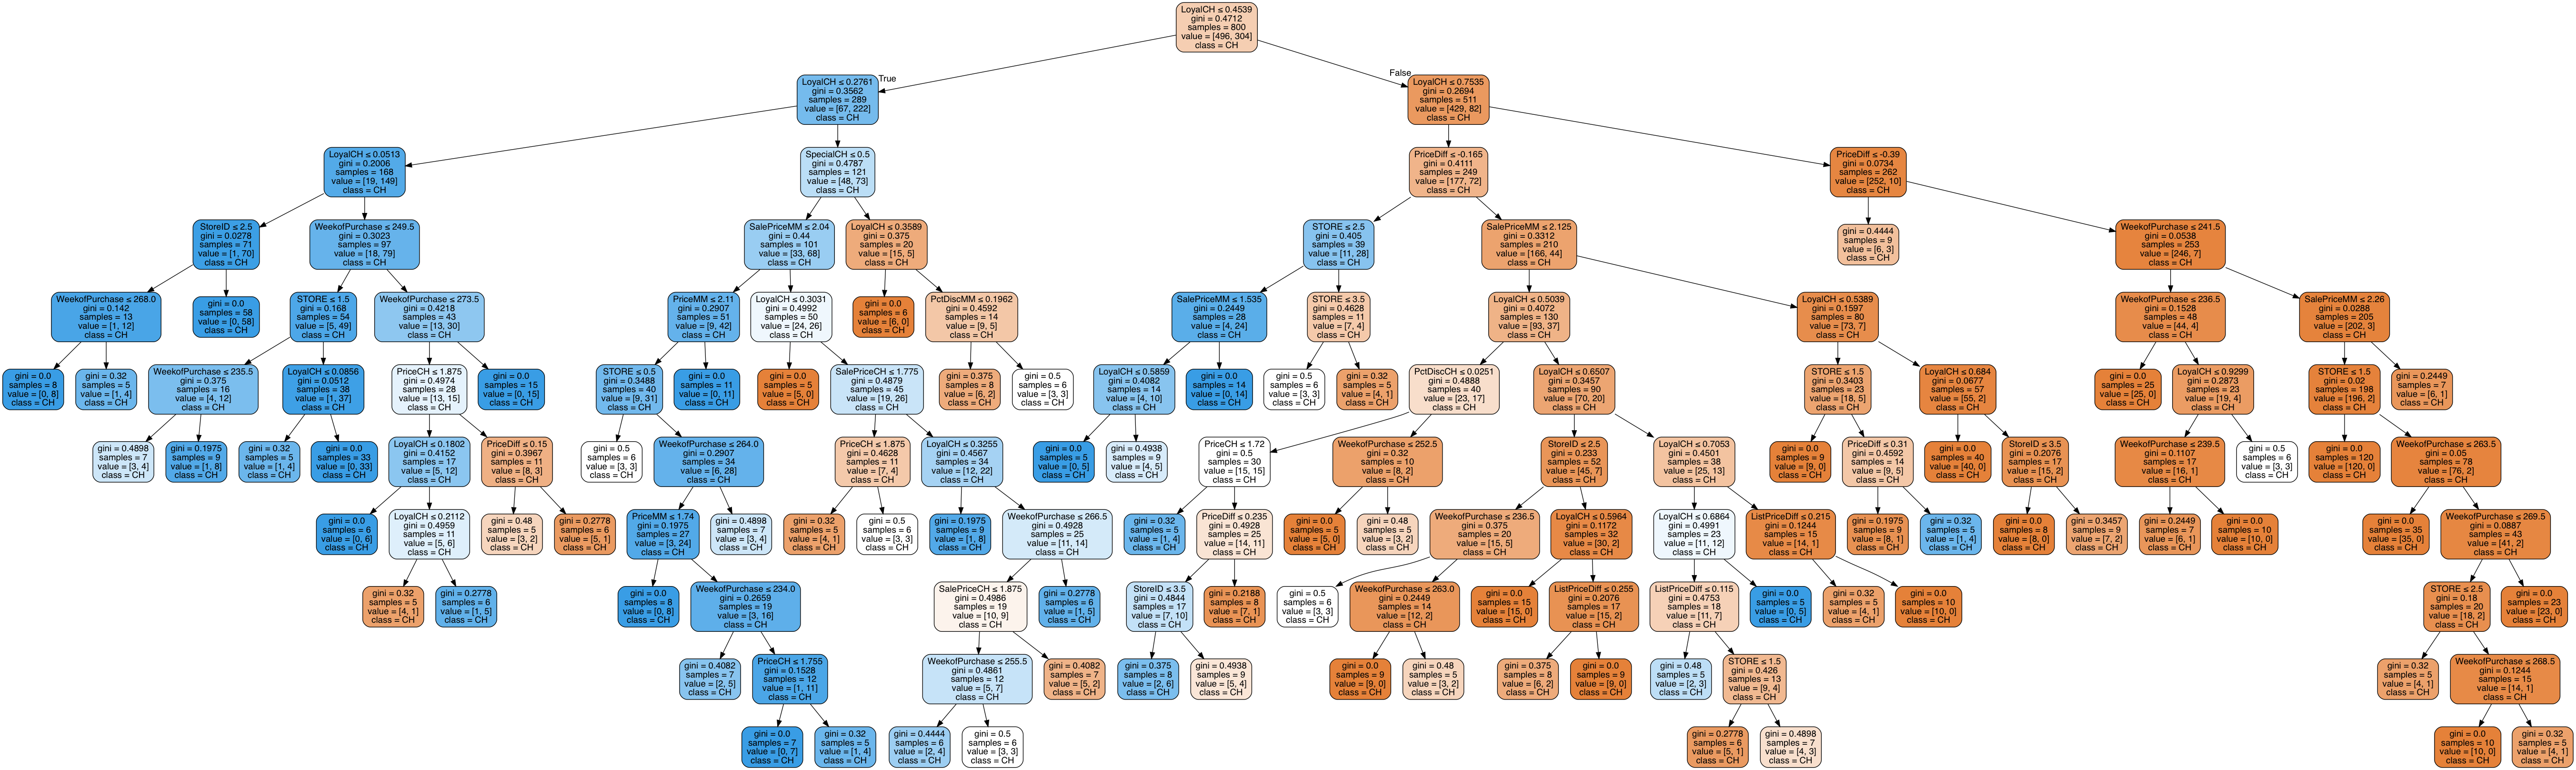

In [75]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=x_train.columns,
                                class_names=y_train,
                                filled=True,rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [78]:
pred = clf.predict(x_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No','Yes'], columns=['No', 'Yes'])
print(cm)

      No  Yes
No   140   36
Yes   17   77


In [79]:
test_e = 1 - clf.score(x_test, y_test)
test_e

0.1962962962962963

## Exercise - Boosting and Baseball Players.

We now use boosting to predict “Salary” in the “Hitters” data set.

a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [109]:
hitters = pd.read_csv('Hitters.csv').dropna()
hitters = hitters.drop('Unnamed: 0', axis=1)
hitters['Salary'] = np.log(hitters['Salary'])
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [110]:
hitters.Division.unique()

array(['W', 'E'], dtype=object)

In [111]:
hitters.Division = hitters.Division.map({'W': 0, 'E': 1})

In [112]:
hitters.League.unique()

array(['N', 'A'], dtype=object)

In [113]:
hitters.League = hitters.League.map({'N': 0, 'A': 1})

In [114]:
hitters.NewLeague = hitters.NewLeague.map({'N': 0, 'A': 1})

In [115]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,6.163315,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,6.173786,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,6.214608,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,4.516339,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,6.620073,1


b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [116]:
hitters.shape

(263, 20)

In [117]:
x = hitters.drop('Salary', axis=1)
y = hitters['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=263-200, random_state=1)


c) Perform boosting on the training set with 1000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

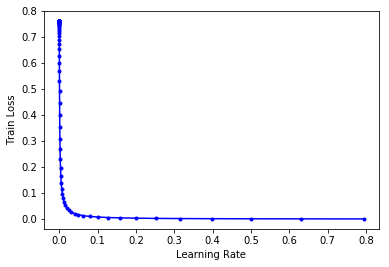

In [121]:
lambdas = 10 ** np.arange(-10, 0, 0.1)

errors = []
for i in lambdas:
    gbr = GradientBoostingRegressor(n_estimators=1000,
                                   learning_rate=i,
                                   random_state=0)
    
    gbr.fit(x_train, y_train)
    errors.append(np.mean(gbr.train_score_))

plt.plot(lambdas, errors, '.-b')
plt.ylabel('Train Loss')
plt.xlabel('Learning Rate')
plt.show()

d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

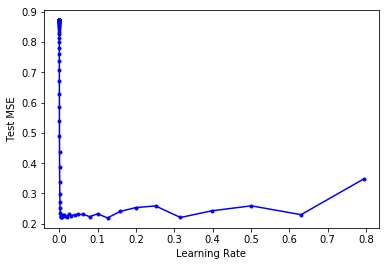

In [124]:
test_errors = []
for i in lambdas:
    gbr = GradientBoostingRegressor(n_estimators=1000,
                                   learning_rate=i,
                                   random_state=0)
    
    gbr.fit(x_train, y_train)
    test_errors.append(mean_squared_error(y_test, gbr.predict(x_test)))

plt.plot(lambdas, test_errors, '.-b')
plt.ylabel('Test MSE')
plt.xlabel('Learning Rate')
plt.show()

In [126]:
min(test_errors)

0.21932295943423188

In [125]:
lambdas[test_errors.index(min(test_errors))]

0.12589254117940735

e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen before.

In [127]:
from sklearn.linear_model import LinearRegression, Ridge

lr = LinearRegression()
lr.fit(x_train, y_train)
mean_squared_error(y_test, lr.predict(x_test))

0.45263888847265982

In [128]:
ridge = Ridge(alpha=0)
ridge.fit(x_train, y_train)
mean_squared_error(y_test, ridge.predict(x_test))

0.45263888847266326

GBR has lowest MSE

f) Which variables appear to be the most important predictors in the boosted model?

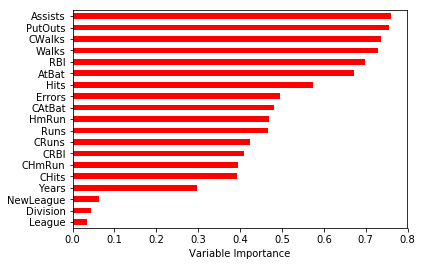

In [129]:
Importance = pd.DataFrame({'Importance': gbr.feature_importances_*100}, index=x.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

g) Now apply bagging to the training set. What is the test set MSE for this approach ?

In [130]:
bagging = BaggingRegressor(n_estimators=500, max_features=10, random_state=1)
bagging.fit(x_train, y_train)
mean_squared_error(y_test, bagging.predict(x_test))

0.2336776276034048

## Exercise - Boosting vs. other Classification algorithms.

This question uses the `Caravan` data set.

a) Create a training set consisting of the first 1000 observations, and a test set consisting of the remaining observations.

In [131]:
caravan = pd.read_csv('Caravan.csv', index_col=0)
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [133]:
caravan.Purchase.unique()

array(['No', 'Yes'], dtype=object)

In [134]:
caravan.Purchase = caravan.Purchase.map({'No': 0, 'Yes': 1})
caravan.Purchase

1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
       ..
5793    0
5794    0
5795    0
5796    0
5797    0
5798    1
5799    0
5800    0
5801    0
5802    0
5803    0
5804    0
5805    0
5806    0
5807    0
5808    0
5809    0
5810    0
5811    0
5812    0
5813    0
5814    0
5815    0
5816    0
5817    0
5818    0
5819    0
5820    1
5821    0
5822    0
Name: Purchase, dtype: int64

In [136]:
caravan.shape

(5822, 86)

In [137]:
x = caravan.drop('Purchase', axis=1)
y = caravan['Purchase']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=5822-1000, random_state=0)

b) Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1000 trees, and a shrinkage value of 0.01. Which predictors appear to be most important?

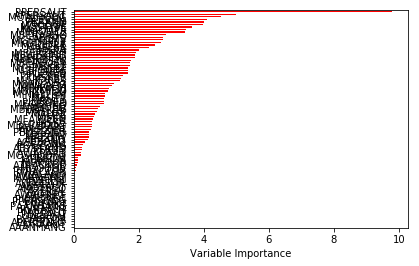

In [142]:
gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=0)
gbc.fit(x_train, y_train)

Importance = pd.DataFrame({'Importance': gbc.feature_importances_*100}, index=x.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [145]:
Importance.sort_values(by='Importance', ascending=False)[:15]

,Importance
PPERSAUT,9.799567
APERSAUT,4.991045
MOPLHOOG,4.533230
ALEVEN,4.100345
PBRAND,4.020096
MGODGE,3.992750
MOSTYPE,3.636369
MGODPR,3.443087
MINK7512,3.411793
MBERARBO,2.838701


c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20%. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [146]:
from sklearn.linear_model import LogisticRegression

In [148]:
pred = []

for prob in gbc.predict_proba(x_test)[:, 1]:
    if prob >= 0.2:
        pred.append(1)
    else:
        pred.append(0)
    
confusion_matrix(y_test, pred)

array([[4327,  205],
       [ 246,   44]])

In [149]:
44 / (44 + 205)

0.17670682730923695

In [156]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

pred = []
for prob in lg.predict_proba(x_test)[:, 1]:
    if prob >= 0.2:
        pred.append(1)
    else:
        pred.append(0)
        
confusion_matrix(y_test, pred)

array([[4230,  302],
       [ 235,   55]])

In [157]:
55 / (55 + 302)

0.15406162464985995

## Exercise - Open-ended exploration.

Apply boosting, bagging, and random forests to a data set of your choice. Be sure to fit models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?

In [158]:
weekly = pd.read_csv('Weekly.csv', index_col = 0)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [160]:
weekly = weekly.drop(['Year', 'Today'], axis=1)
weekly.Direction = weekly.Direction.map({'Down': 0, 'Up': 1})
weekly.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
1,0.816,1.572,-3.936,-0.229,-3.484,0.154976,0
2,-0.270,0.816,1.572,-3.936,-0.229,0.148574,0
3,-2.576,-0.270,0.816,1.572,-3.936,0.159837,1
4,3.514,-2.576,-0.270,0.816,1.572,0.161630,1
5,0.712,3.514,-2.576,-0.270,0.816,0.153728,1


In [161]:
x = weekly.drop('Direction', axis=1)
y = weekly['Direction']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [162]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

pred = lg.predict(x_test)

confusion_matrix(y_test, pred)

array([[ 63, 171],
       [ 83, 228]])

In [163]:
lg.score(x_test, y_test)

0.53394495412844034

In [166]:
gbc = GradientBoostingClassifier(n_estimators=500, random_state=0)
gbc.fit(x_train, y_train)

pred = gbc.predict(x_test)
confusion_matrix(y_test, pred)

array([[116, 118],
       [130, 181]])

In [167]:
gbc.score(x_test, y_test)

0.54495412844036695

In [170]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=500, random_state=0)
bagging.fit(x_train, y_train)

pred = bagging.predict(x_test)
confusion_matrix(y_test, pred)

array([[ 90, 144],
       [120, 191]])

In [171]:
bagging.score(x_test, y_test)

0.51559633027522933

In [172]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, random_state=0)
rfc.fit(x_train, y_train)

pred = rfc.predict(x_test)
confusion_matrix(y_test, pred)

array([[ 91, 143],
       [120, 191]])

In [173]:
rfc.score(x_test, y_test)

0.51743119266055049